In [10]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [11]:
df = pd.read_csv("C:\\Users\\abhic\\My Datasets\\Used_Car_Details2.csv")
df

,Unnamed: 0,brands,kmdriven,no_of_owner,Fuel,varient,Price,emi,Location
0,0,2018 Maruti Alto 800,"20,086",1,Petrol,Manual,"3,12,999","6,962",Ahmedabad
1,1,2021 Maruti Alto,"4,066",1,Petrol,Manual,"3,75,499","8,353",Ahmedabad
2,2,2019 Maruti Eeco,"80,770",1,Petrol,Manual,"4,32,199","9,614",Ahmedabad
3,3,2018 Maruti Alto 800,"65,915",1,Petrol,Manual,"3,22,499","7,174",Ahmedabad
4,4,2021 Maruti Alto,"4,231",1,Petrol,Manual,"3,78,699","8,424",Ahmedabad
...,...,...,...,...,...,...,...,...,...
3729,650,2015 Honda City,"1,50,323",1,Petrol,Manual,"5,41,899","12,054",Pune
3730,651,2019 Maruti Alto K10,"57,875",1,Petrol + CNG,Manual,"4,23,599","9,423",Pune
3731,652,2018 Ford Ecosport,"18,482",1,Diesel,Manual,"9,99,599","22,236",Pune
3732,653,2018 Ford Ecosport,"17,005",2,Petrol,Manual,"9,32,799","20,750",Pune


In [12]:
#displaying the max columns
pd.set_option("display.max_columns",None)
df.head()

,Unnamed: 0,brands,kmdriven,no_of_owner,Fuel,varient,Price,emi,Location
0,0,2018 Maruti Alto 800,"20,086",1,Petrol,Manual,"3,12,999","6,962",Ahmedabad
1,1,2021 Maruti Alto,"4,066",1,Petrol,Manual,"3,75,499","8,353",Ahmedabad
2,2,2019 Maruti Eeco,"80,770",1,Petrol,Manual,"4,32,199","9,614",Ahmedabad
3,3,2018 Maruti Alto 800,"65,915",1,Petrol,Manual,"3,22,499","7,174",Ahmedabad
4,4,2021 Maruti Alto,"4,231",1,Petrol,Manual,"3,78,699","8,424",Ahmedabad


In [13]:
# Checking the info of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3734 entries, 0 to 3733
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   3734 non-null   int64 
 1   brands       3734 non-null   object
 2   kmdriven     3734 non-null   object
 3   no_of_owner  3734 non-null   int64 
 4   Fuel         3734 non-null   object
 5   varient      3687 non-null   object
 6   Price        3734 non-null   object
 7   emi          3734 non-null   object
 8   Location     3734 non-null   object
dtypes: int64(2), object(7)
memory usage: 262.7+ KB


In [14]:
# Checking null values
df.isnull().sum()

Unnamed: 0      0
brands          0
kmdriven        0
no_of_owner     0
Fuel            0
varient        47
Price           0
emi             0
Location        0
dtype: int64

There are null values in our dataset.

In [15]:
# Checking the dimensions of the training dataset
df.shape

(3734, 9)

<AxesSubplot:>

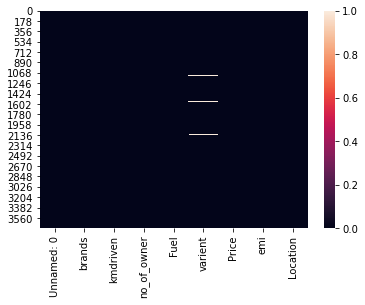

In [16]:
# plotting heatmap
sns.heatmap(df.isnull())

In [18]:
# Filling missing values with mode
df['varient']=df['varient'].fillna(df['varient'].mode()[0])

In [19]:
# Dropping the unrequired column
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df

,brands,kmdriven,no_of_owner,Fuel,varient,Price,emi,Location
0,2018 Maruti Alto 800,"20,086",1,Petrol,Manual,"3,12,999","6,962",Ahmedabad
1,2021 Maruti Alto,"4,066",1,Petrol,Manual,"3,75,499","8,353",Ahmedabad
2,2019 Maruti Eeco,"80,770",1,Petrol,Manual,"4,32,199","9,614",Ahmedabad
3,2018 Maruti Alto 800,"65,915",1,Petrol,Manual,"3,22,499","7,174",Ahmedabad
4,2021 Maruti Alto,"4,231",1,Petrol,Manual,"3,78,699","8,424",Ahmedabad
...,...,...,...,...,...,...,...,...
3729,2015 Honda City,"1,50,323",1,Petrol,Manual,"5,41,899","12,054",Pune
3730,2019 Maruti Alto K10,"57,875",1,Petrol + CNG,Manual,"4,23,599","9,423",Pune
3731,2018 Ford Ecosport,"18,482",1,Diesel,Manual,"9,99,599","22,236",Pune
3732,2018 Ford Ecosport,"17,005",2,Petrol,Manual,"9,32,799","20,750",Pune


In [20]:
df.isnull().sum()

brands         0
kmdriven       0
no_of_owner    0
Fuel           0
varient        0
Price          0
emi            0
Location       0
dtype: int64

<AxesSubplot:>

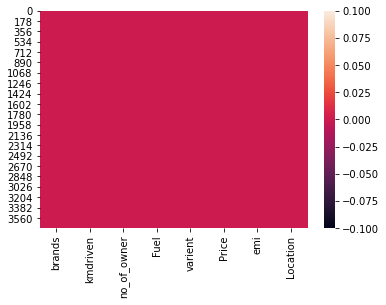

In [21]:
# plotting heatmap
sns.heatmap(df.isnull())

Now we can see that there are no null values in our dataset.

In [22]:
# checking the unique values
df.nunique()

brands          467
kmdriven       3595
no_of_owner       4
Fuel              4
varient           2
Price          2747
emi            2747
Location          8
dtype: int64

In [23]:
from sklearn.preprocessing import LabelEncoder

df = df.copy()
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])
df.head() 

,brands,kmdriven,no_of_owner,Fuel,varient,Price,emi,Location
0,326,724,0,1,1,498,2104,0
1,454,1789,0,1,1,760,2367,0
2,384,3307,0,1,1,1056,2662,0
3,326,2874,0,1,1,536,2142,0
4,454,1795,0,1,1,773,2380,0


array([[<AxesSubplot:title={'center':'brands'}>,
        <AxesSubplot:title={'center':'kmdriven'}>,
        <AxesSubplot:title={'center':'no_of_owner'}>,
        <AxesSubplot:title={'center':'Fuel'}>,
        <AxesSubplot:title={'center':'varient'}>,
        <AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'emi'}>,
        <AxesSubplot:title={'center':'Location'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [

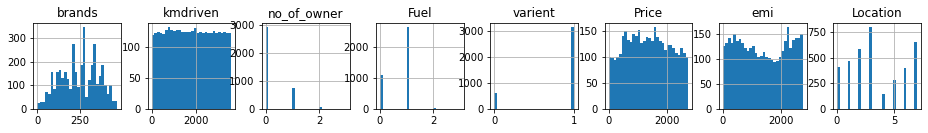

In [24]:
# plotting a histogram
df.hist(figsize=(20,20), grid = True, layout = (10,10), bins = 30)

In [25]:
# Checking Correlation
df.corr()

,brands,kmdriven,no_of_owner,Fuel,varient,Price,emi,Location
brands,1.000000,-0.209141,-0.205775,0.144148,-0.121412,0.251169,-0.154651,-0.082870
kmdriven,-0.209141,1.000000,0.031856,-0.169938,0.024494,0.004603,0.003040,0.000247
no_of_owner,-0.205775,0.031856,1.000000,0.020941,-0.031584,-0.059078,0.011229,-0.046044
Fuel,0.144148,-0.169938,0.020941,1.000000,-0.051934,-0.125431,0.001840,-0.050202
varient,-0.121412,0.024494,-0.031584,-0.051934,1.000000,0.061503,-0.006590,-0.114468
Price,0.251169,0.004603,-0.059078,-0.125431,0.061503,1.000000,-0.470150,0.035243
emi,-0.154651,0.003040,0.011229,0.001840,-0.006590,-0.470150,1.000000,-0.015526
Location,-0.082870,0.000247,-0.046044,-0.050202,-0.114468,0.035243,-0.015526,1.000000


<AxesSubplot:>

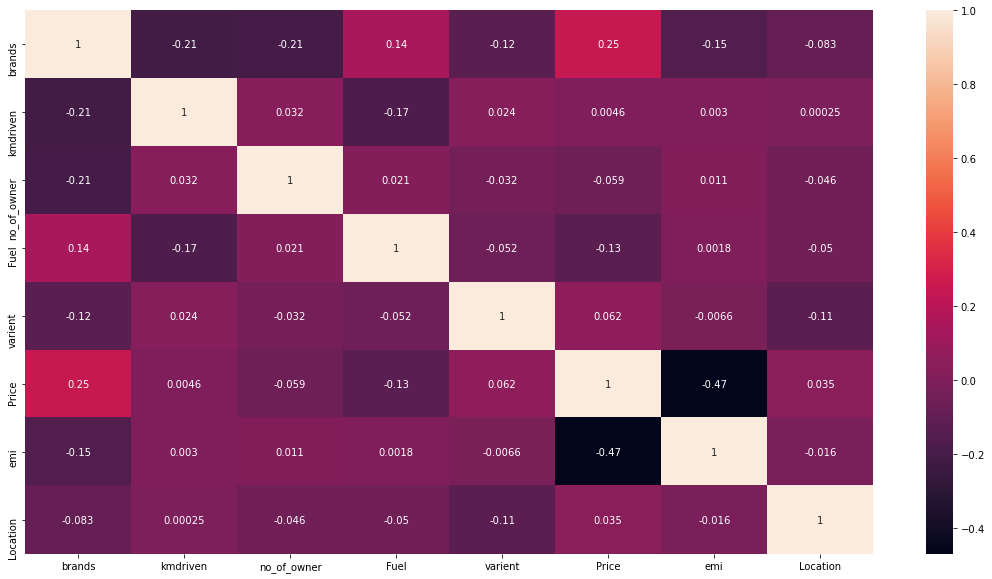

In [26]:
# Plotting correlation heatmap
plt.figure(figsize=[19,10],facecolor='white')
sns.heatmap(df.corr(),annot=True)

In [28]:
# Checking the target Variable
df['Price'].value_counts()

594     18
623     13
1585    12
1633     8
1571     8
        ..
1312     1
1314     1
1318     1
1322     1
2047     1
Name: Price, Length: 2747, dtype: int64

<AxesSubplot:xlabel='Price', ylabel='count'>

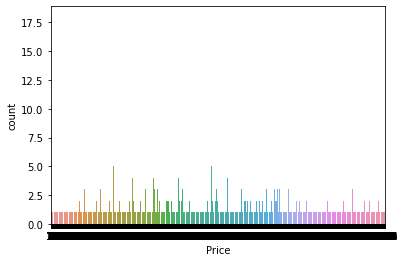

In [29]:
sns.countplot(df['Price'])

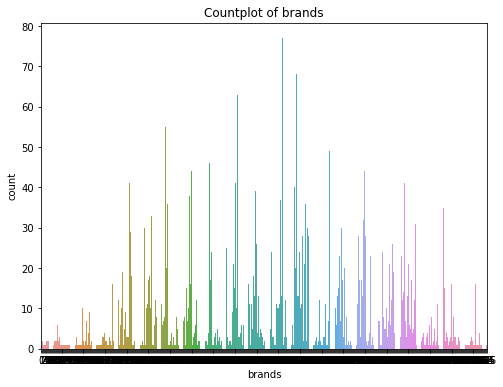

252    77
267    68
205    63
216    62
130    55
       ..
25      1
27      1
29      1
31      1
465     1
Name: brands, Length: 467, dtype: int64

In [30]:
# Let's check the column brands

plt.subplots(figsize=(8,6))
sns.countplot(x="brands", data=df)
plt.title("Countplot of brands")
plt.xlabel('brands')
plt.ylabel("count")
plt.show()

df['brands'].value_counts()

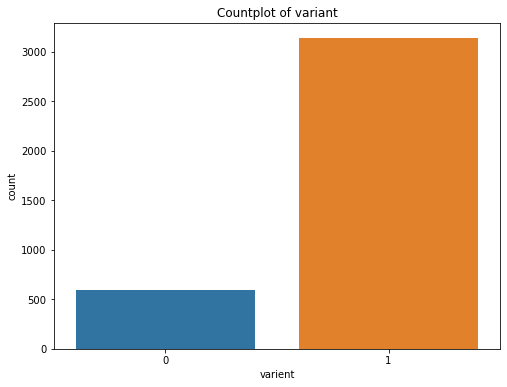

1    3136
0     598
Name: varient, dtype: int64

In [31]:
plt.subplots(figsize=(8,6))
sns.countplot(x="varient", data=df)
plt.title("Countplot of variant")
plt.xlabel('varient')
plt.ylabel("count")
plt.show()

df['varient'].value_counts()

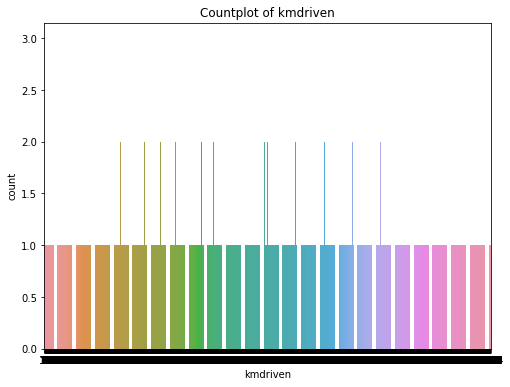

787     3
1150    3
1998    3
390     2
1789    2
       ..
625     1
2676    1
629     1
2680    1
2047    1
Name: kmdriven, Length: 3595, dtype: int64

In [33]:
# checking  the  value count of column driven_kms

plt.subplots(figsize=(8,6))
sns.countplot(x="kmdriven", data=df)
plt.title("Countplot of kmdriven")
plt.xlabel('kmdriven')
plt.ylabel("count")
plt.show()

df['kmdriven'].value_counts()

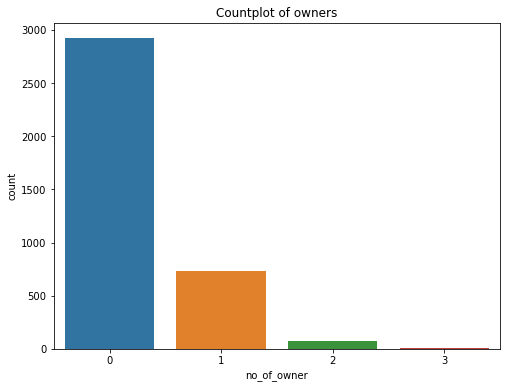

0    2921
1     729
2      76
3       8
Name: no_of_owner, dtype: int64

In [34]:
# checking  the  value count of column owners

plt.subplots(figsize=(8,6))
sns.countplot(x="no_of_owner", data=df)
plt.title("Countplot of owners")
plt.xlabel('no_of_owner')
plt.ylabel("count")
plt.show()

df['no_of_owner'].value_counts()

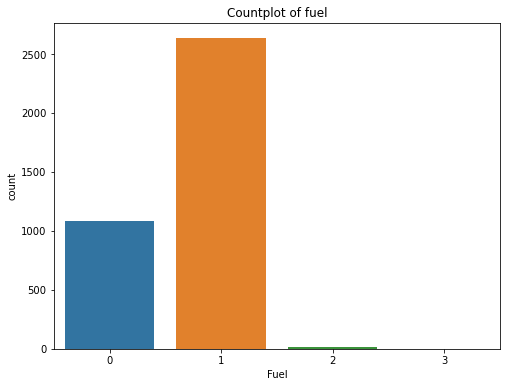

1    2634
0    1084
2      15
3       1
Name: Fuel, dtype: int64

In [36]:
# checking  the  value count of column fuel

plt.subplots(figsize=(8,6))
sns.countplot(x="Fuel", data=df)
plt.title("Countplot of fuel")
plt.xlabel('Fuel')
plt.ylabel("count")
plt.show()

df['Fuel'].value_counts()

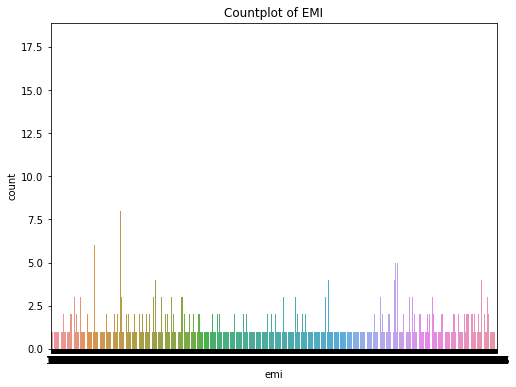

2200    18
2229    13
444     12
492      8
430      8
        ..
1498     1
1500     1
1502     1
1504     1
2047     1
Name: emi, Length: 2747, dtype: int64

In [37]:
plt.subplots(figsize=(8,6))
sns.countplot(x="emi", data=df)
plt.title("Countplot of EMI")
plt.xlabel('emi')
plt.ylabel("count")
plt.show()

df['emi'].value_counts()

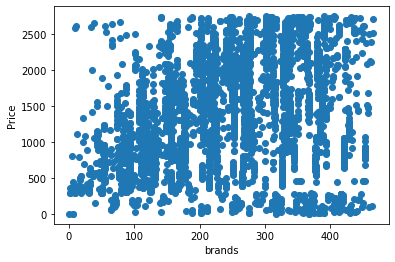

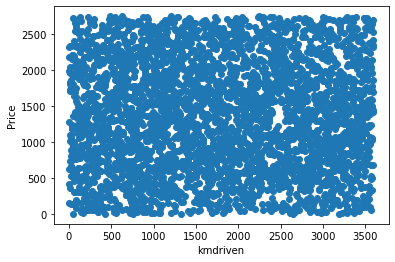

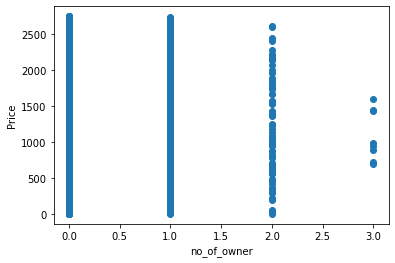

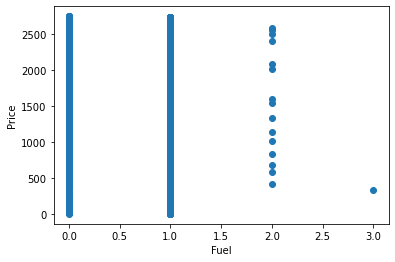

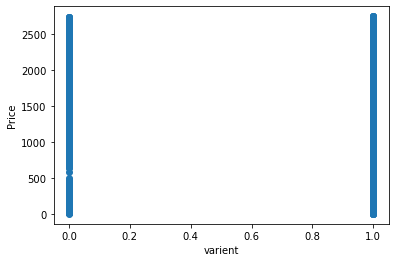

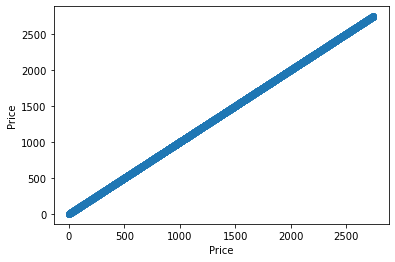

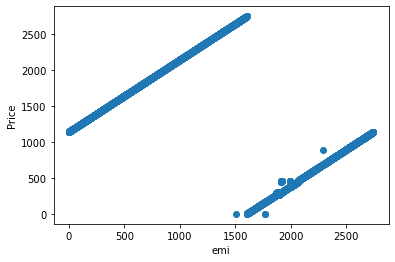

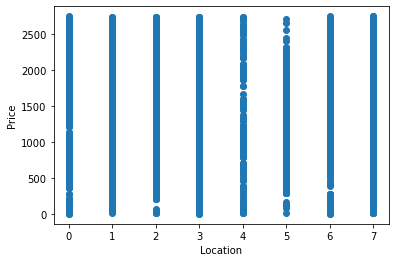

In [38]:
# plotting the Scatter plot between all feature variables and target variable

for col in df.describe().columns:
    df=df.copy()
    plt.scatter(df[col],df['Price'])
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()

In [39]:
# Checking the Statistical Summary
df.describe()

,brands,kmdriven,no_of_owner,Fuel,varient,Price,emi,Location
count,3734.000000,3734.000000,3734.000000,3734.000000,3734.000000,3734.000000,3734.000000,3734.000000
mean,244.979646,1792.422603,0.242367,0.714247,0.839850,1367.373326,1368.982057,3.477236
std,107.224014,1033.391695,0.487084,0.462381,0.366794,751.413446,827.445697,2.351827
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,157.000000,899.250000,0.000000,0.000000,1.000000,738.250000,619.250000,2.000000
50%,252.000000,1789.500000,0.000000,1.000000,1.000000,1361.000000,1340.500000,3.000000
75%,332.000000,2687.750000,0.000000,1.000000,1.000000,1989.750000,2142.000000,6.000000
max,466.000000,3594.000000,3.000000,3.000000,1.000000,2746.000000,2746.000000,7.000000


brands           AxesSubplot(0.125,0.816017;0.0824468x0.0639831)
kmdriven       AxesSubplot(0.223936,0.816017;0.0824468x0.0639...
no_of_owner    AxesSubplot(0.322872,0.816017;0.0824468x0.0639...
Fuel           AxesSubplot(0.421809,0.816017;0.0824468x0.0639...
varient        AxesSubplot(0.520745,0.816017;0.0824468x0.0639...
Price          AxesSubplot(0.619681,0.816017;0.0824468x0.0639...
emi            AxesSubplot(0.718617,0.816017;0.0824468x0.0639...
Location       AxesSubplot(0.817553,0.816017;0.0824468x0.0639...
dtype: object

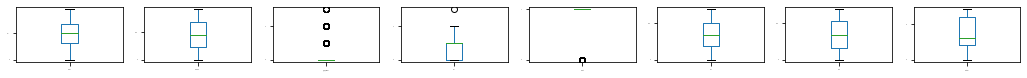

In [40]:
# Checking Outliers
df.plot(kind='box',subplots=True,layout=(10,8),sharex=False,fontsize=1,figsize=(18,12))

We can see there are outliers in our dataset which we need to remove before moving further.

In [41]:
# Removing outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.75571882, 1.03403744, 0.49765518, ..., 1.15713895, 0.88841647,
        1.47872334],
       [1.94964113, 0.00331245, 0.49765518, ..., 0.80841603, 1.20630467,
        1.47872334],
       [1.29671487, 1.46583358, 0.49765518, ..., 0.41443899, 1.56287128,
        1.47872334],
       ...,
       [0.52253086, 1.13178694, 0.49765518, ..., 1.83495694, 0.28648368,
        1.49808432],
       [0.52253086, 1.20340539, 1.55565359, ..., 1.76042074, 0.21879646,
        1.49808432],
       [0.06548247, 1.47052285, 0.49765518, ..., 0.8353733 , 0.62245901,
        1.49808432]])

In [42]:
threshold=3
print(np.where(z>3))

(array([  56,   58,   70,  125,  199,  450,  478,  497,  528,  585,  592,
        609,  618,  641,  671,  686,  686,  711,  785,  790,  805,  819,
        834,  849,  898,  928,  965, 1022, 1057, 1088, 1093, 1129, 1136,
       1153, 1157, 1230, 1244, 1380, 1390, 1427, 1587, 1763, 1902, 1915,
       1938, 2052, 2285, 2322, 2440, 2458, 2468, 2479, 2561, 2642, 2646,
       2735, 2746, 2764, 2883, 2891, 2954, 3041, 3087, 3106, 3131, 3137,
       3146, 3151, 3153, 3193, 3201, 3222, 3267, 3282, 3296, 3310, 3434,
       3445, 3516, 3542, 3573, 3647, 3663, 3674, 3707], dtype=int64), array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int64))


In [43]:
df_new=df[(z<3).all(axis=1)]
df_new

,brands,kmdriven,no_of_owner,Fuel,varient,Price,emi,Location
0,326,724,0,1,1,498,2104,0
1,454,1789,0,1,1,760,2367,0
2,384,3307,0,1,1,1056,2662,0
3,326,2874,0,1,1,536,2142,0
4,454,1795,0,1,1,773,2380,0
...,...,...,...,...,...,...,...,...
3729,152,167,0,1,1,1604,463,7
3730,379,2589,0,2,1,1009,2615,7
3731,301,623,0,0,1,2746,1606,7
3732,301,549,1,1,1,2690,1550,7


In [44]:
df_new.shape

(3650, 8)

In [45]:
# Checking the percentage of loss data
loss_percent =(3658-3582)/3658*100
print(loss_percent)

2.077638053581192


In [46]:
#checking Skewness after removing Outliers
df_new.skew()

brands        -0.112637
kmdriven       0.014914
no_of_owner    1.502760
Fuel          -0.809866
varient       -1.875227
Price          0.030018
emi            0.043764
Location       0.194202
dtype: float64

In [47]:
# Removing Skewness
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
df_new[['varient','no_of_owner']] = scaler.fit_transform(df_new[['varient','no_of_owner']].values)

In [48]:
df_new.skew()

brands        -0.112637
kmdriven       0.014914
no_of_owner    1.502760
Fuel          -0.809866
varient       -1.875227
Price          0.030018
emi            0.043764
Location       0.194202
dtype: float64

There is no skewness in our data.

In [49]:
x = df_new.drop("Price",axis=1)
y = df_new["Price"]

In [50]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)


In [51]:
X

,brands,kmdriven,no_of_owner,Fuel,varient,emi,Location
0,0.742425,-1.032267,-0.499572,0.623962,0.433318,0.893207,-1.480880
1,1.942126,-0.002295,-0.499572,0.623962,0.433318,1.211612,-1.480880
2,1.286040,1.465777,-0.499572,0.623962,0.433318,1.568758,-1.480880
3,0.742425,1.047019,-0.499572,0.623962,0.433318,0.939212,-1.480880
4,1.942126,0.003507,-0.499572,0.623962,0.433318,1.227350,-1.480880
...,...,...,...,...,...,...,...
3645,-0.888418,-1.570947,-0.499572,0.623962,0.433318,-1.093494,1.500249
3646,1.239177,0.771392,-0.499572,2.788849,0.433318,1.511856,1.500249
3647,0.508109,-1.129945,-0.499572,-1.540925,0.433318,0.290296,1.500249
3648,0.508109,-1.201511,2.001714,0.623962,0.433318,0.222498,1.500249


In [52]:
# Checking multicollinearity using VIF
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["Features"] = X.columns
vif

,vif,Features
0,1.151684,brands
1,1.069490,kmdriven
2,1.040712,no_of_owner
3,1.051170,Fuel
4,1.038432,varient
5,1.026977,emi
6,1.034104,Location


In [53]:
# PCA
# Importing and fitting data to pca
from sklearn.decomposition import PCA

pca =PCA(n_components=5)
pca.fit(x)

PCA(n_components=5)

In [54]:
pca.explained_variance_ratio_

array([6.06787559e-01, 3.87173521e-01, 6.03459416e-03, 3.11844976e-06,
       5.70911151e-07])

In [55]:
x_returned_pca=pca.transform(x)

In [56]:
x_returned_pca.shape

(3650, 5)

In [57]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x,y)

ExtraTreesRegressor()

In [58]:
print(selection.feature_importances_)

[0.04017392 0.00438325 0.00179027 0.00612709 0.01051813 0.93273481
 0.00427254]


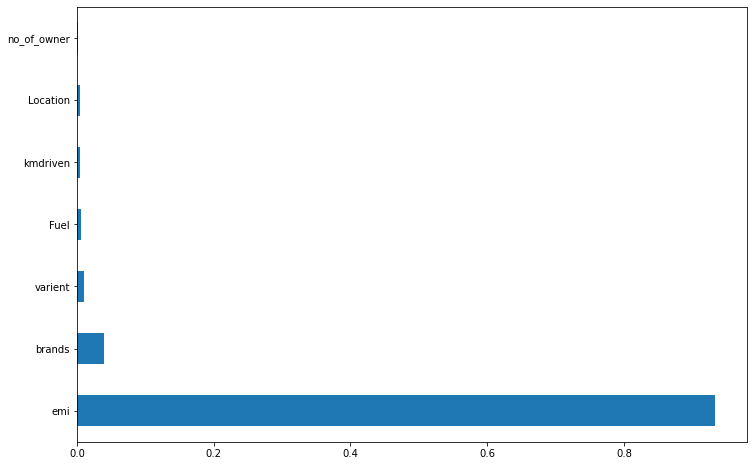

In [59]:
# Plotting graph  for feature importance
plt.figure(figsize = (12,8))
feat_imp = pd.Series(selection.feature_importances_ , index= x.columns)
feat_imp.nlargest(20).plot(kind ='barh')
plt.show()

In [60]:
#splitting the  data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [61]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)
print(lr.score(x_train,y_train))
lr_predict=lr.predict(x_test)

0.2954846464295855


In [62]:
from sklearn.metrics import mean_absolute_error
print('MSE:',mean_squared_error(lr_predict,y_test))
print('MAE:',mean_absolute_error(lr_predict,y_test))
print('r2_score:',r2_score(lr_predict,y_test))

MSE: 466364.69019080105
MAE: 545.0973246388982
r2_score: -2.012563896356057


In [63]:
# Using SGD regressor
from sklearn.linear_model import SGDRegressor
from sklearn import metrics
sgd=SGDRegressor()
sgd.fit(x_train,y_train)
pred=sgd.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: -1.8135919950821272e+24
MSE: 1.1012952578726632e+30
MAE: 860090877201566.9
RMSE: 1049426156464885.9


In [64]:
# Using LASSO
from sklearn.linear_model import Lasso,Ridge
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
ls=Lasso()
Z=GridSearchCV(ls,parameters)
Z.fit(x_train,y_train)
print(Z.best_params_)

{'alpha': 1, 'random_state': 0}


In [65]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.23212043359220114
MSE: 466291.2757640014
MAE: 545.1498125327679
RMSE: 682.8552377803084


In [66]:
# Using RIDGE
parameters={'alpha':[0.001,0.01,0.1,1,10],'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}
rd=Ridge()
Z1=GridSearchCV(rd,parameters)
Z1.fit(x_train,y_train)
print(Z1.best_params_)

{'alpha': 10, 'solver': 'auto'}


In [67]:
rd=Ridge(alpha=10,solver='lsqr')
rd.fit(x_train,y_train)
pred=rd.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.21472729126450774
MSE: 476853.1801046332
MAE: 555.1088086889005
RMSE: 690.545567000928


In [68]:
#Fitting the RandomForest Model 
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

RandomForestRegressor()

In [69]:
#predicting the value on X_test

y_pred = reg_rf.predict(x_test)

In [70]:
reg_rf.score(x_train, y_train)

0.9999882603178628

In [71]:
reg_rf.score(x_test, y_test)

0.9851469797788607

In [72]:
metrics.r2_score(y_test, y_pred)

0.9851469797788607

In [73]:
# Hypereparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [74]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [75]:
rf_random = RandomizedSearchCV( estimator = reg_rf , param_distributions= random_grid , scoring='neg_mean_squared_error',
                               n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [76]:
rf_random.fit(x_train , y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [77]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [78]:
prediction = rf_random.predict(x_test)

In [79]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 5.993354193285612
MSE: 8737.640173005053
RMSE: 93.47534526817782


In [80]:
print("R2 Score of Our Model is : ")
print()
metrics.r2_score(y_test, prediction)

R2 Score of Our Model is : 



0.9856110210587121

Hence, Random Forest Regressor gives us the best accuracy score

In [81]:
# Saving The model
import pickle
file = 'USED CAR PRICE PREDICTION.pkl'
#save file
save = pickle.dump(RandomForestRegressor,open(file,'wb'))

In [82]:
# Conclusion
rf_predict = pd.DataFrame({
    'Actual_Price' : y_test,
    'Predicted_Price' : y_pred
})

rf_predict['Error'] = rf_predict['Actual_Price'] - rf_predict['Predicted_Price']

rf_predict

,Actual_Price,Predicted_Price,Error
1349,1413,1412.46,0.54
1714,1098,1097.52,0.48
234,2368,2367.90,0.10
3034,2652,2650.92,1.08
2267,2236,2236.49,-0.49
...,...,...,...
3456,1828,1828.40,-0.40
348,1078,1076.76,1.24
1793,1704,1704.01,-0.01
1638,290,290.04,-0.04
